#Credit Card Fraud Detection   

Project  by : HAQ NAWAZ MALIK

In [1]:
 #download thid dataset "" https://drive.google.com/file/d/1CTAlmlREFRaEN3NoHHitewpqAtWS5cVQ/view  """ and unzio it

!gdown --id 1CTAlmlREFRaEN3NoHHitewpqAtWS5cVQ
!unzip -j *.zip


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1CTAlmlREFRaEN3NoHHitewpqAtWS5cVQ
From (redirected): https://drive.google.com/uc?id=1CTAlmlREFRaEN3NoHHitewpqAtWS5cVQ&confirm=t&uuid=476b30e8-d95d-4074-9cee-028bc5da9929
To: /content/Credit-Card-Dataset.zip
100% 69.2M/69.2M [00:00<00:00, 95.1MB/s]
Archive:  Credit-Card-Dataset.zip
  inflating: creditcard.csv.zip      


In [2]:
#unzip /content/creditcard.csv.zip

!unzip -j /content/creditcard.csv.zip


Archive:  /content/creditcard.csv.zip
  inflating: creditcard.csv          


In [3]:
# import these "" library(ranger)
# library(caret)
# library(data.table)  ""

!pip install ranger
!pip install caret
!pip install data.table


  Preparing metadata (setup.py) ... done
  Created wheel for ranger: filename=ranger-0.10-py3-none-any.whl size=27077 sha256=3cf127a71a0be67843303126140c747c747b3b78a80af9c1cd9361d4ee246a43
  Stored in directory: /root/.cache/pip/wheels/43/de/e8/6e7377ad7fdc0e8bcb74957c3a6da82cc81de9e827e94756c1
Successfully built ranger
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 9.4 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement data.table (from versions: none)
ERROR: No matching distribution found for data.table


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load your credit card data (replace 'creditcard.csv' with your actual file)
data = pd.read_csv('/content/creditcard.csv')

In [5]:
# xplore the data that is contained in the creditcard_data dataframe. We will proceed by displaying the creditcard_data using the head() function as well as the tail() function. We will then proceed to explore the other components of this dataframe –

# Display the first few rows of the dataframe
print(data.head())

# Display the last few rows of the dataframe
print(data.tail())

# Display the shape of the dataframe
print(data.shape)

# Display the columns of the dataframe
print(data.columns)

# Display the data types of the dataframe
print(data.dtypes)

# Display the summary statistics of the dataframe
print(data.describe())

# Display the correlation matrix of the dataframe
print(data.corr())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
#  tail(creditcard_data,6)

print(data.tail(6))


            Time         V1         V2        V3        V4        V5  \
284801  172785.0   0.120316   0.931005 -0.546012 -0.745097  1.130314   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284801 -0.235973  0.812722  0.115093 -0.204064  ... -0.314205 -0.808520   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.48618

In [7]:
#  table(creditcard_data$Class)
# summary(creditcard_data$Amount)
# names(creditcard_data)
# var(creditcard_data$Amount)

import pandas as pd
# Create a table of the 'Class' column
print(pd.crosstab(data['Class'], columns='count'))

# Summarize the 'Amount' column
print(data['Amount'].describe())

# Get the names of the columns
print(data.columns.tolist())

# Calculate the variance of the 'Amount' column
print(data['Amount'].var())


col_0   count
Class        
0      284315
1         492
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
62560.06904632383


In [8]:
#  sd(creditcard_data$Amount)

print(data['Amount'].std())


250.1201092401885


In [47]:
# head(creditcard_data)

data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


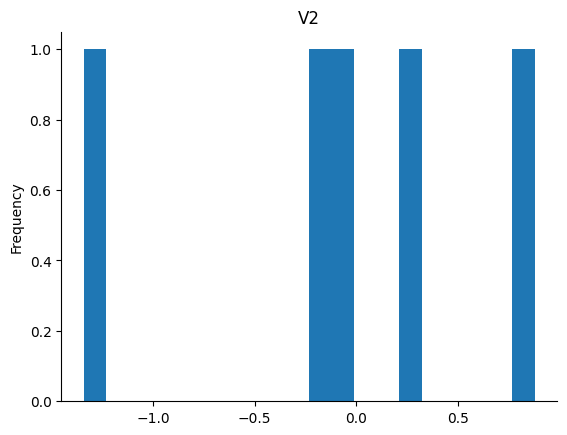

In [46]:
from matplotlib import pyplot as plt
_df_2['V2'].plot(kind='hist', bins=20, title='V2')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
# Replace 'your_dataframe.csv' with the actual file or data source if needed
# data = pd.read_csv('your_dataframe.csv')

# Create a scaler object
scaler = StandardScaler()

# Standardize the 'Amount' column
data['Amount'] = scaler.fit_transform(data[['Amount']]) # Use 'data' instead of 'creditcard_data'

# Create a new DataFrame excluding the first column
NewData = data.iloc[:, 1:]

# Display the first six rows of NewData
print(NewData.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.12

In [13]:
# we have standardized our entire dataset, we will split our dataset into training set as well as test set with a split ratio of 0.80. This means that 80% of our data will be attributed to the train_data whereas 20% will be attributed to the test data. We will then find the dimensions using the dim() function –

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(NewData, data['Class'], test_size=0.2, random_state=42)

# Print the dimensions of the training and test sets
print('X_train dimensions:', X_train.shape)
print('X_test dimensions:', X_test.shape)
print('y_train dimensions:', y_train.shape)
print('y_test dimensions:', y_test.shape)


X_train dimensions: (227845, 30)
X_test dimensions: (56962, 30)
y_train dimensions: (227845,)
y_test dimensions: (56962,)


In [14]:
# Fitting Logistic Regression Model
# In this section of credit card fraud detection project, we will fit our first model. We will begin with logistic regression. A logistic regression is used for modeling the outcome probability of a class such as pass/fail, positive/negative and in our case – fraud/not fraud. We proceed to implement this model on our test data as follows –

# Import the LogisticRegression model from sklearn
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression object
logisticReg = LogisticRegression()

# Fit the LogisticRegression model with training data
logisticReg.fit(X_train, y_train)

# Print the model coefficients
print(logisticReg.coef_)

# Print the model intercept
print(logisticReg.intercept_)


[[-1.55740868e-03  5.17797388e-02  8.56060315e-03  4.16382889e-01
   4.06833355e-02 -1.31110972e-01 -1.38518456e-02 -1.22897703e-01
  -6.03783299e-02 -2.04552890e-01 -3.83020391e-02 -6.83684902e-02
  -9.60578944e-02 -3.15567009e-01 -6.14264608e-02 -7.34527394e-02
   1.12100719e-01 -9.18878073e-03  1.38421983e-02 -1.40329888e-01
   1.44740375e-01  3.55279958e-01 -9.85660956e-02 -7.80335870e-02
   8.03962263e-02 -1.69849559e-01 -2.75736659e-01 -1.17398539e-01
   1.24553949e-01  1.10317455e+01]]
[-10.366628]


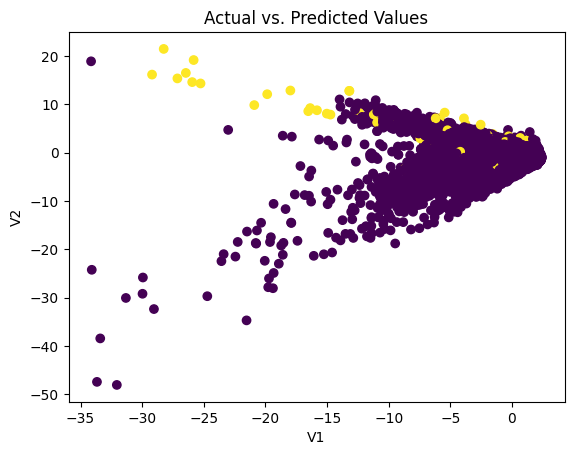

In [15]:
# plot the logistic graph

# Import the necessary libraries
import matplotlib.pyplot as plt

# Create a LogisticRegression object
logisticReg = LogisticRegression()

# Fit the LogisticRegression model with training data
logisticReg.fit(X_train, y_train)

# Create a new DataFrame with the test data
X_test_new = X_test.copy()

# Add a new column to the test data DataFrame called "predictions"
X_test_new["predictions"] = logisticReg.predict(X_test)

# Plot the actual and predicted values
plt.scatter(X_test_new["V1"], X_test_new["V2"], c=X_test_new["predictions"])

# Add labels and title
plt.xlabel("V1")
plt.ylabel("V2")
plt.title("Actual vs. Predicted Values")

# Show the plot
plt.show()


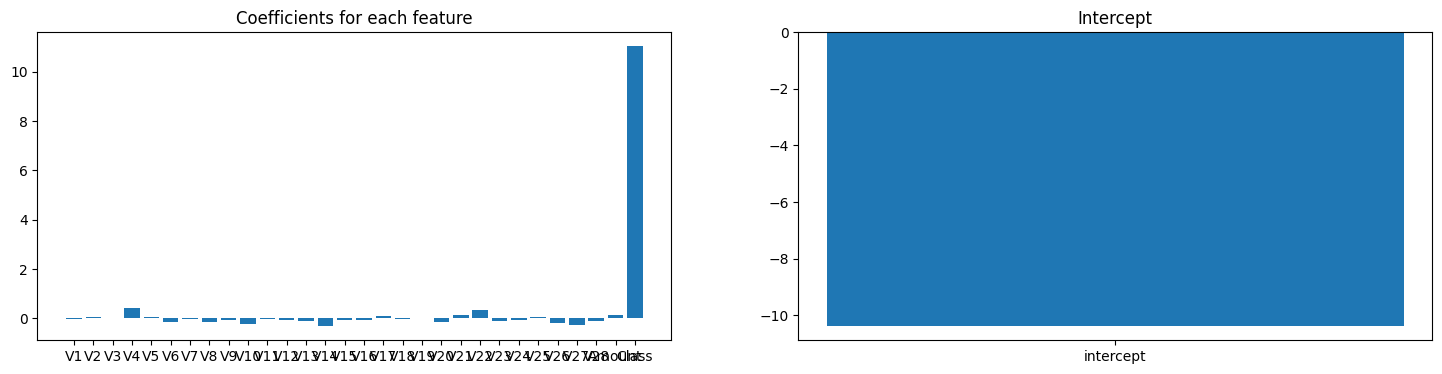

In [16]:
# After we have summarised our model, we will visual it through the following plots –

import matplotlib.pyplot as plt
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

# Plot the coefficients for each feature
axes[0].bar(NewData.columns, logisticReg.coef_[0])
axes[0].set_title('Coefficients for each feature')

# Plot the intercept
axes[1].bar(['intercept'], logisticReg.intercept_)
axes[1].set_title('Intercept')

# Show the plot
plt.show()


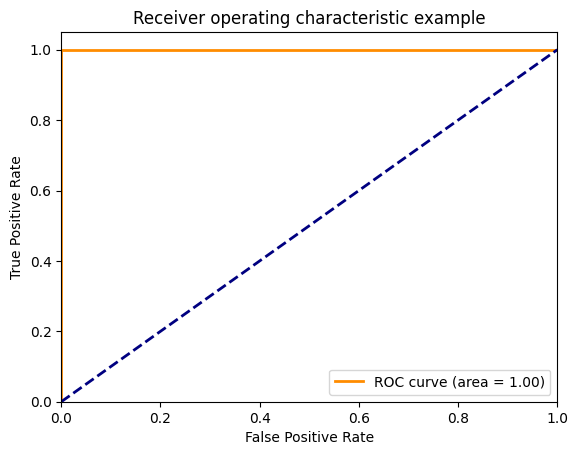

In [17]:
#  In order to assess the performance of our model, we will delineate the ROC curve. ROC is also known as Receiver Optimistic Characteristics. For this, we will first import the ROC package and then plot our ROC curve to analyze its performance.

import matplotlib.pyplot as plt
# Import the necessary libraries
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logisticReg.predict_proba(X_test)[:,1])

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


Training score: 1.0
Test score: 1.0


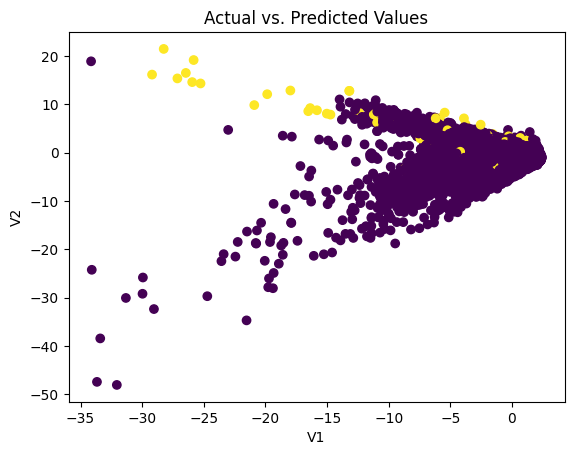

In [18]:
# Fitting a Decision Tree Model

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier object
decisionTree = DecisionTreeClassifier()

# Fit the DecisionTreeClassifier model with training data
decisionTree.fit(X_train, y_train)

# Print the model score on the training data
print('Training score:', decisionTree.score(X_train, y_train))

# Print the model score on the test data
print('Test score:', decisionTree.score(X_test, y_test))

# Create a new DataFrame with the test data
X_test_new = X_test.copy()

# Add a new column to the test data DataFrame called "predictions"
X_test_new["predictions"] = decisionTree.predict(X_test)

# Plot the actual and predicted values
plt.scatter(X_test_new["V1"], X_test_new["V2"], c=X_test_new["predictions"])

# Add labels and title
plt.xlabel("V1")
plt.ylabel("V2")
plt.title("Actual vs. Predicted Values")

# Show the plot
plt.show()


In [21]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_ANN = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),

    Dense(16, activation='relu'),

    Dense(8, activation='relu'),

    Dense(1, activation='sigmoid')
])

model_ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1665 (6.50 KB)
Trainable params: 1665 (6.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
Model: "sequential"


In [23]:
history = model_ANN.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
2849/2849 [==============================] - 20s 6ms/step - loss: 0.0128 - accuracy: 0.9980 - val_loss: 0.0020 - val_accuracy: 0.9994
Epoch 2/10
2849/2849 [==============================] - 9s 3ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0011 - val_accuracy: 0.9996
Epoch 3/10
2849/2849 [==============================] - 7s 3ms/step - loss: 6.5430e-04 - accuracy: 0.9997 - val_loss: 6.7661e-04 - val_accuracy: 0.9996
Epoch 4/10
2849/2849 [==============================] - 9s 3ms/step - loss: 4.7533e-04 - accuracy: 0.9998 - val_loss: 3.2057e-04 - val_accuracy: 0.9999
Epoch 5/10
2849/2849 [==============================] - 8s 3ms/step - loss: 3.6476e-04 - accuracy: 0.9999 - val_loss: 4.9166e-04 - val_accuracy: 0.9998
Epoch 6/10
2849/2849 [==============================] - 8s 3ms/step - loss: 3.5004e-04 - accuracy: 0.9999 - val_loss: 3.5725e-04 - val_accuracy: 1.0000
Epoch 7/10
2849/2849 [==============================] - 10s 4ms/step - loss: 3.0448e-04 - accuracy: 0.9

In [24]:
y_pred = model_ANN.predict(X_test)
y_pred = (y_pred > 0.5)

1781/1781 [==============================] - 6s 3ms/step


In [26]:
!pip install scikit-learn
from sklearn.metrics import classification_report

classification_report(y_pred,y_test) # Now classification_report is defined and can be used.

'              precision    recall  f1-score   support\n\n       False       1.00      1.00      1.00     56865\n        True       0.99      1.00      0.99        97\n\n    accuracy                           1.00     56962\n   macro avg       0.99      1.00      1.00     56962\nweighted avg       1.00      1.00      1.00     56962\n'

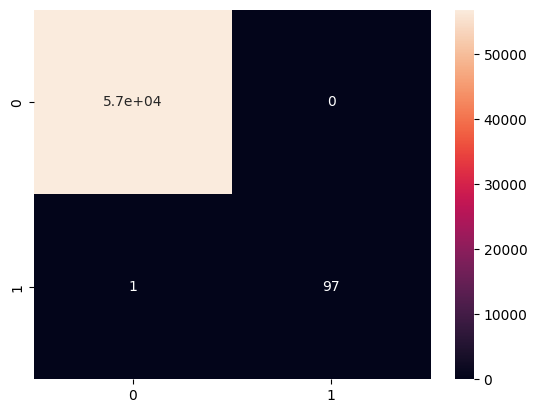

In [28]:
!pip install scikit-learn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.show()

To determine how well the model is performing, we can calculate the accuracy, which gives us the percentage of correctly predicted instances out of the total predictions. Here’s how to calculate it step by step:

1. **True Positives (TP)**: 97
2. **True Negatives (TN)**: 57000
3. **False Positives (FP)**: 0
4. **False Negatives (FN)**: 1

The total number of predictions is the sum of all four values:
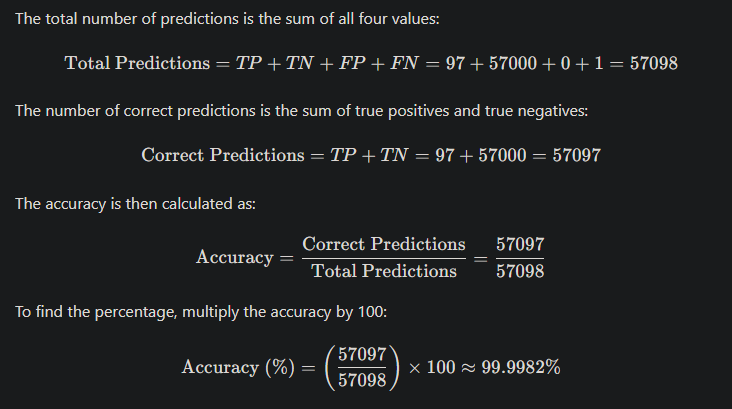





So, the model is working with an accuracy of approximately 99.9982%. This means the model correctly predicts the class for about 99.9982% of the instances, which indicates a very high level of performance.

In [36]:
#  define X

X = data.iloc[:, 1:30]


In [37]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [45]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


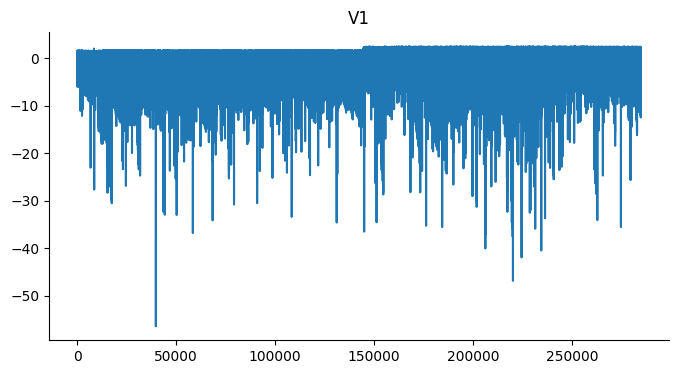

In [42]:
from matplotlib import pyplot as plt
X['V1'].plot(kind='line', figsize=(8, 4), title='V1')
plt.gca().spines[['top', 'right']].set_visible(False)

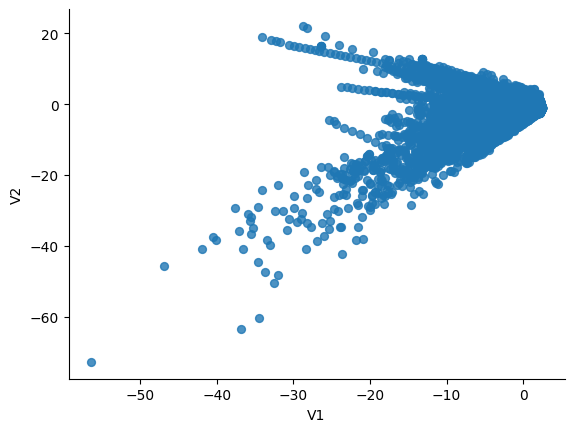

In [43]:
from matplotlib import pyplot as plt
X.plot(kind='scatter', x='V1', y='V2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

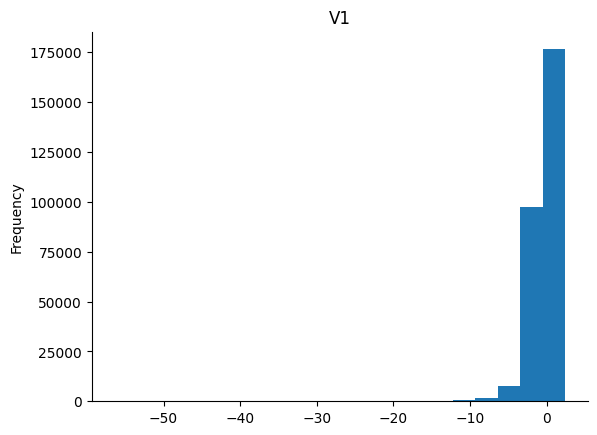

In [44]:
from matplotlib import pyplot as plt
X['V1'].plot(kind='hist', bins=20, title='V1')
plt.gca().spines[['top', 'right',]].set_visible(False)

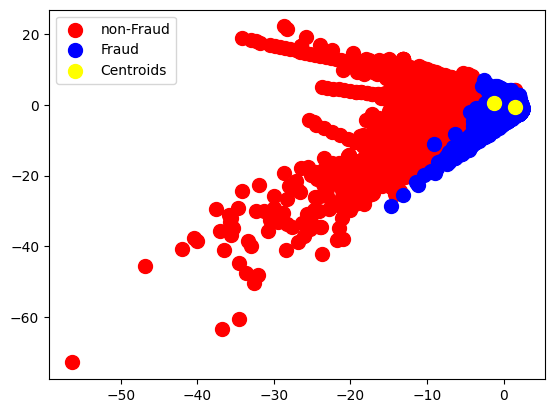

In [41]:
plt.scatter(X[y_kmeans == 0].iloc[:, 0], X[y_kmeans == 0].iloc[:, 1],
            s = 100, c = 'red', label = 'non-Fraud')
plt.scatter(X[y_kmeans == 1].iloc[:, 0], X[y_kmeans == 1].iloc[:, 1],
            s = 100, c = 'blue', label = 'Fraud')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

The graph indicates that the clustering algorithm has effectively distinguished between non-fraudulent and fraudulent transactions. The clear clustering and distinct centroids suggest that the features used for clustering are well-suited for identifying patterns associated with fraud. This visualization supports the effectiveness of the model in detecting fraudulent transactions based on the given features.